<a href="https://colab.research.google.com/github/LKSfiuza/MachineLearning-AI-UFV/blob/main/ELT574_118678_Atividade_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1 - Utilize o notebook disponibilizado para o problema de classificação multiclasse Fashion MNIST e, ajustando diferentes hiperparâmetros de treinamento, tente atingir 90% de acurácia nas inferências. Apresente o gráfico de treinamento e validação da função de loss. Caso não consiga atingir este nível de precisão, mostre qual foi seu melhor resultado.

In [22]:
import tensorflow as tf
from tensorflow import keras
#Importando as bibliotecas para análise do problema e configurando o notebook

## OS para executar comandos de diretorio
import os

## Habilitar Google Drive no Colab
# from google.colab import drive
# drive.mount('/content/drive')

## NumPy para manipular matrizes e vetores
import numpy as np

## Pandas para manipular os dataframes
import pandas as pd

## Plotar figuras bonitas
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns

print('Setup completo!')

Setup completo!


In [23]:
# Importando o dataset MNIST do keras

fashion_mnist = keras.datasets.fashion_mnist


In [24]:
# Este dataset já contem os dados de treinamento e teste separados. O dataset de treinamento é composto por 60.000 imagens com 28x28 pixels.

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
print(X_train_full.shape)
print(y_train_full.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [25]:
# Separando os dados de validação utilizado no treinamento e normalizar o valor

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255. #o ponto em 255. caracteriza a conversao para float
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [26]:
# Testando um modelo PMC

model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28, 28]),
  keras.layers.Dense(300, activation="relu"),
  keras.layers.Dense(100, activation="relu"),
  keras.layers.Dense(10, activation="softmax")
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_11 (Dense)            (None, 300)               235500    
                                                                 
 dense_12 (Dense)            (None, 100)               30100     
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
# Compilando a função de otimização, o otimizador e o indicador de métrica.

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [28]:
# Realizando o treinamento do modelo

history = model.fit(X_train,y_train, epochs=30,
                    validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.7297 - accuracy: 0.7609 - val_loss: 0.5771 - val_accuracy: 0.7840
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4928 - accuracy: 0.8278 - val_loss: 0.4654 - val_accuracy: 0.8370
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4444 - accuracy: 0.8429 - val_loss: 0.4363 - val_accuracy: 0.8536
Epoch 4/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4176 - accuracy: 0.8537 - val_loss: 0.3934 - val_accuracy: 0.8624
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3966 - accuracy: 0.8600 - val_loss: 0.3950 - val_accuracy: 0.8624
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3799 - accuracy: 0.8658 - val_loss: 0.4279 - val_accuracy: 0.8458
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3670 - accuracy: 0.8692 - val_loss: 0.3728 - val_accurac

313/313 [==============================] - 1s 3ms/step - loss: 0.3412 - accuracy: 0.8800
Acurácia no conjunto de teste: 0.8800


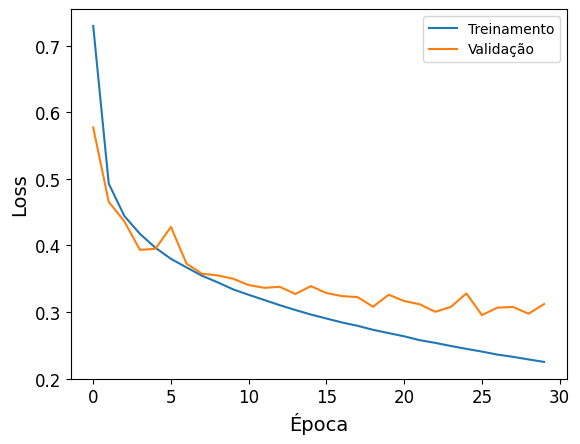

In [29]:
test_loss, test_acc = model.evaluate(X_test,y_test)
print(f'Acurácia no conjunto de teste: {test_acc:.4f}')

plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

## Foi encontrado um valor satisfatório de acurácia, para o conjunto de teste no primeiro modelo, porém irei realizar algumas modificações a fim de buscar resultados ainda melhores.

Epoch 1/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.5065 - accuracy: 0.8174 - val_loss: 0.3993 - val_accuracy: 0.8542
Epoch 2/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3731 - accuracy: 0.8623 - val_loss: 0.3586 - val_accuracy: 0.8646
Epoch 3/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3333 - accuracy: 0.8776 - val_loss: 0.3354 - val_accuracy: 0.8794
Epoch 4/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3123 - accuracy: 0.8840 - val_loss: 0.3207 - val_accuracy: 0.8820
Epoch 5/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2945 - accuracy: 0.8902 - val_loss: 0.3154 - val_accuracy: 0.8824
Epoch 6/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2775 - accuracy: 0.8958 - val_loss: 0.2967 - val_accuracy: 0.8880
Epoch 7/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2625 - accuracy: 0.9015 - val_loss: 0.3142 - val_ac

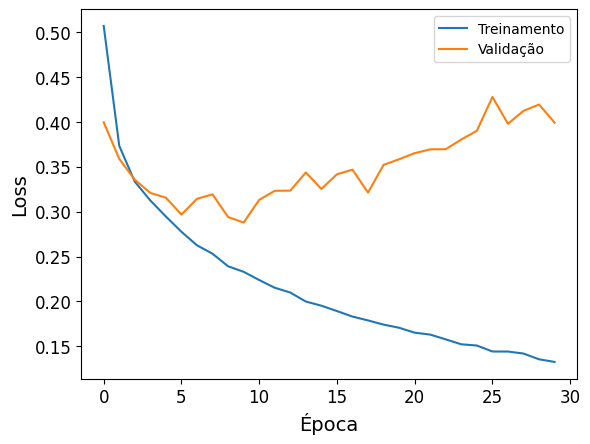

In [30]:
# Será entao modificado os valores de neurônios  das 2 primeiras camadas alem de adicionar uma terceira camada oculta com 50 neurônios

model2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(280, activation='relu'),
    keras.layers.Dense(110, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Foi modificado tambem o tipo de otimizador

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model2.fit(X_train,y_train, epochs=30,
                    validation_data=(X_valid,y_valid))

test_loss, test_acc = model2.evaluate(X_test, y_test)
print(f'Acurácia no conjunto de teste: {test_acc:.4f}')

plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [31]:
from sklearn.metrics import confusion_matrix
model2.evaluate(X_test,y_test)
y_pred = model2.predict(X_test)
confusion_matrix(y_test, np.argmax(y_pred,axis=1))

313/313 [==============================] - 1s 4ms/step


array([[843,   1,  18,   9,   3,   0, 120,   0,   6,   0],
       [  5, 973,   0,  13,   2,   0,   5,   0,   2,   0],
       [ 15,   0, 860,   9,  53,   0,  63,   0,   0,   0],
       [ 32,   3,  13, 887,  33,   0,  28,   0,   4,   0],
       [  2,   0, 151,  32, 762,   0,  52,   0,   1,   0],
       [  0,   0,   1,   0,   0, 968,   0,  18,   1,  12],
       [112,   2,  91,  19,  56,   0, 716,   0,   4,   0],
       [  0,   0,   0,   0,   0,  11,   0, 971,   0,  18],
       [  7,   0,   2,   5,   2,   0,   8,   3, 972,   1],
       [  0,   0,   1,   0,   0,   6,   1,  39,   0, 953]])

## Foi verificado aumento da acurácia em geral ( de 0.8766 para 0.8883 já no conjunto de teste ) após as modificações de parâmetros.

## Mas ao analizar o gráfico é possivel perceber através da curva de validação que o modelo pode estar sofrendo um overfitting.
## Ou seja modelo está aprendendo muito bem os detalhes dos dados de treinamento, mas não está generalizando bem para os dados de validação.

Epoch 1/40
1719/1719 [==============================] - 23s 13ms/step - loss: 1.8838 - accuracy: 0.6687 - val_loss: 1.3119 - val_accuracy: 0.8308
Epoch 2/40
1719/1719 [==============================] - 20s 12ms/step - loss: 1.3098 - accuracy: 0.8043 - val_loss: 1.0775 - val_accuracy: 0.8562
Epoch 3/40
1719/1719 [==============================] - 22s 13ms/step - loss: 1.0974 - accuracy: 0.8306 - val_loss: 0.9435 - val_accuracy: 0.8628
Epoch 4/40
1719/1719 [==============================] - 20s 12ms/step - loss: 0.9550 - accuracy: 0.8435 - val_loss: 0.8252 - val_accuracy: 0.8708
Epoch 5/40
1719/1719 [==============================] - 21s 12ms/step - loss: 0.8531 - accuracy: 0.8503 - val_loss: 0.7523 - val_accuracy: 0.8724
Epoch 6/40
1719/1719 [==============================] - 20s 12ms/step - loss: 0.7745 - accuracy: 0.8573 - val_loss: 0.6892 - val_accuracy: 0.8758
Epoch 7/40
1719/1719 [==============================] - 22s 13ms/step - loss: 0.7147 - accuracy: 0.8612 - val_loss: 0.6331 -

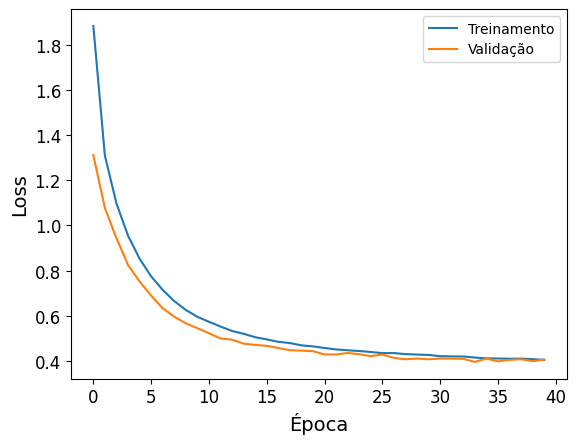

In [37]:
# É então necessaria a mudança nos parametros para evitar esse overfitting como:
# Regularização L2
# Dropout
# Early stopping
# ...
# foi realizada tambem algumas mudanças na quantidade de neurônios

import tensorflow as tf
from tensorflow.keras import models, layers, regularizers

model3 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(10, activation='softmax')
])

# Manteremos o loss e otimizadores usados no modelo2 modificando o learning rate do optimizer Adam

model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Aumento da quantidade de epochs para 40 e adicionado um earlystop

history = model3.fit(X_train,y_train, epochs=40,
                    validation_data=(X_valid,y_valid),
                    callbacks=[keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)])

test_loss, test_acc = model3.evaluate(X_test, y_test)
print(f'Acurácia no conjunto de teste: {test_acc:.4f}')

plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

## Após realizar ajustes nos parâmetros, foi possível alcançar uma acurácia superior ao primeiro modelo treinado (modelo 1). No entanto, não foi possível atingir os 90% de acurácia apenas utilizando um perceptron multicamadas. O melhor resultado de acurácia encontrado foi de 88,38%, alcançado com o modelo 3